# Loading the dataset

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings("ignore")
!pip install pandas-profiling[notebook]

  Using cached joblib-1.1.1-py2.py3-none-any.whl.metadata (5.2 kB)
Using cached joblib-1.1.1-py2.py3-none-any.whl (309 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.2
    Uninstalling joblib-1.4.2:
      Successfully uninstalled joblib-1.4.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.6.0 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.


In [131]:
# This should run for all everyone
url = 'https://drive.google.com/file/d/1yruyN0GYpe0SiyyE57rXxANk1Mz0ckhX/view?usp=sharing'
url='https://drive.google.com/uc?id=' +url.split('/')[-2]

In [132]:
df=pd.read_csv(url)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


From this information we can say that both Categorical and numerical features are present.


1.   Categorical Features: gender, ever_married, work_type, Residence_type, smoking_status
2.   Binary Numerical Features: hypertension,heart_disease, stroke
3.  Continous Numerical Features: age, avg_glucose_level, bmi






In [134]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


Checking Unknown Values:

In [135]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Visualization

<Figure size 1000x1000 with 0 Axes>

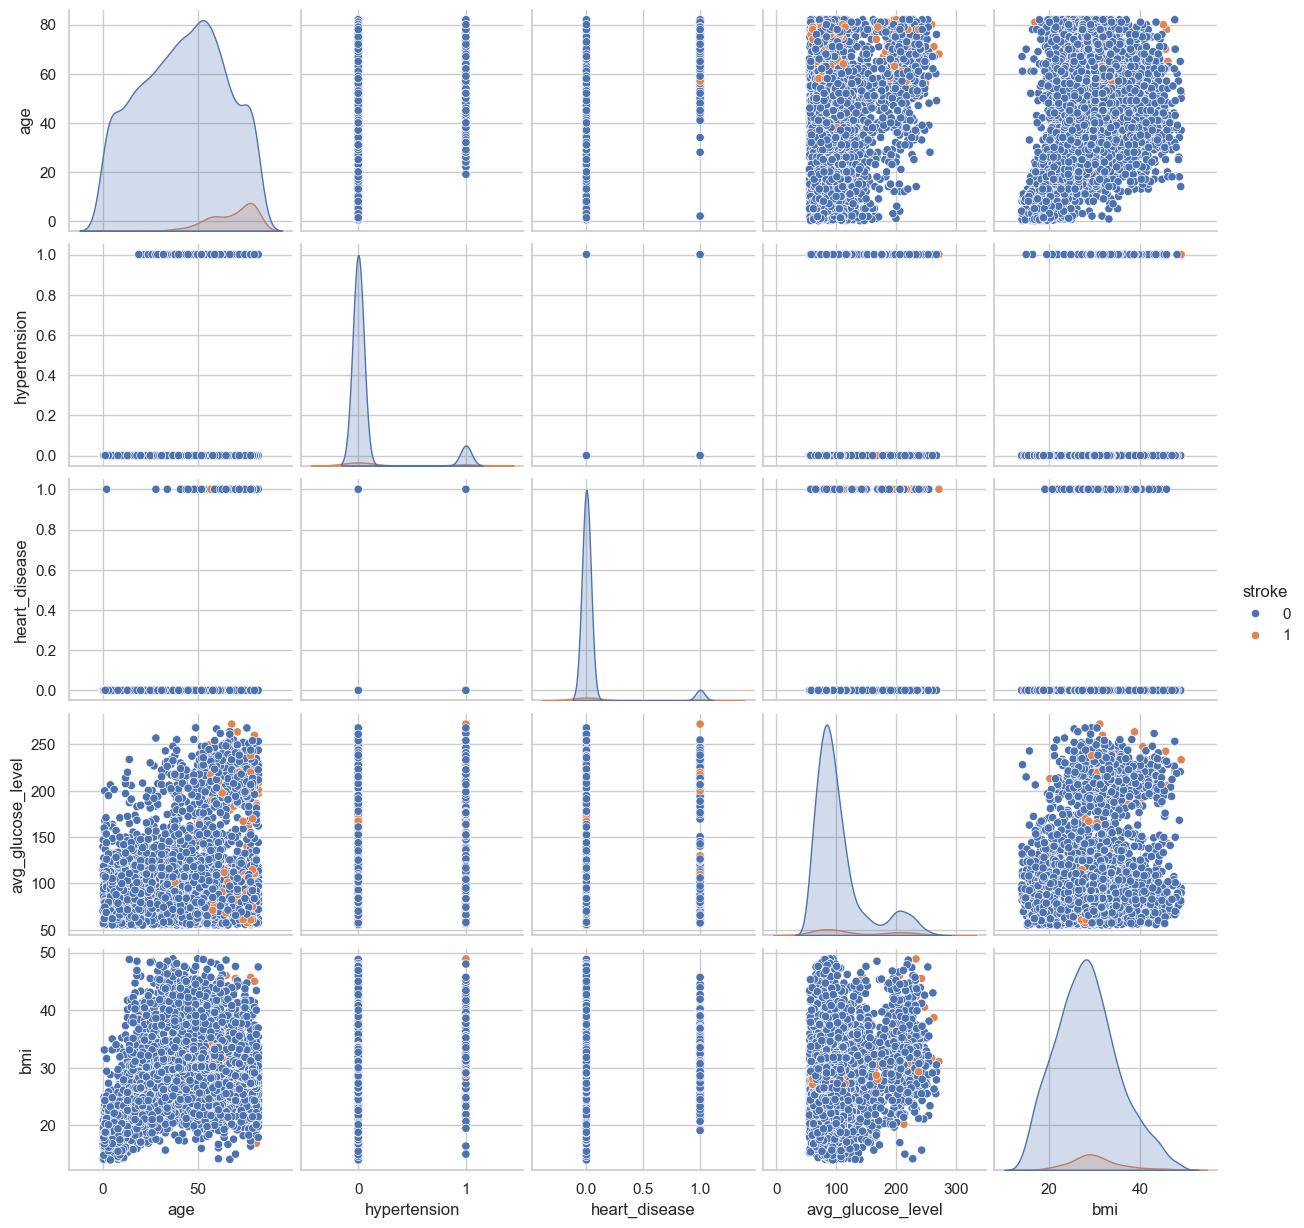

In [136]:
plt.figure(figsize=(10,10))
sns.pairplot(df,hue='stroke')
plt.show()

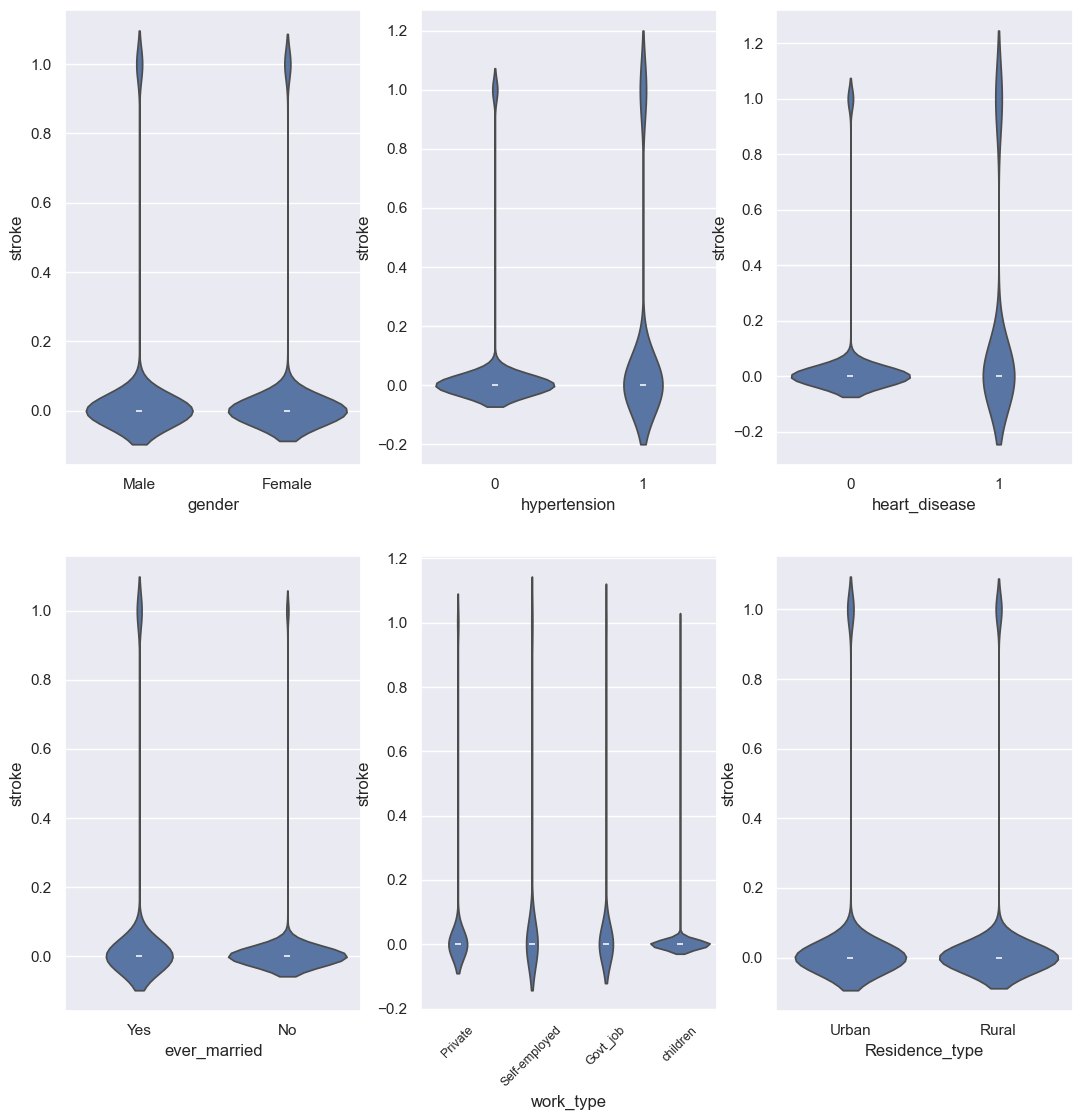

In [137]:
plt.figure(figsize=(13,13))
sns.set_theme(style="darkgrid")
plt.subplot(2,3,1)
sns.violinplot(x = 'gender', y = 'stroke', data = df)
plt.subplot(2,3,2)
sns.violinplot(x = 'hypertension', y = 'stroke', data = df)
plt.subplot(2,3,3)
sns.violinplot(x = 'heart_disease', y = 'stroke', data = df)
plt.subplot(2,3,4)
sns.violinplot(x = 'ever_married', y = 'stroke', data = df)
plt.subplot(2,3,5)
sns.violinplot(x = 'work_type', y = 'stroke', data = df)
plt.xticks(fontsize=9, rotation=45)
plt.subplot(2,3,6)
sns.violinplot(x = 'Residence_type', y = 'stroke', data = df)
plt.show()

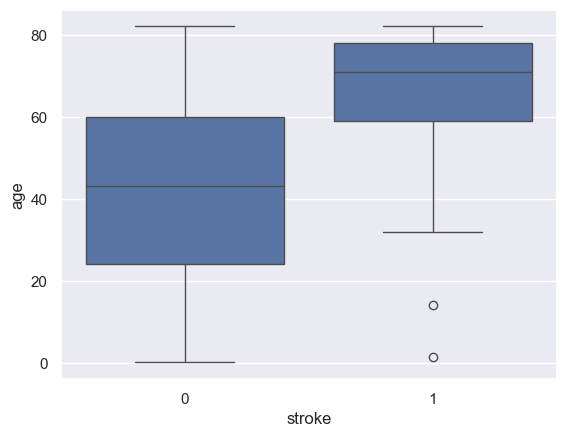

In [138]:
sns.boxplot(data=df,y='age',x='stroke')
plt.show()

We can clearly see that almost all the people who suffered from brain stroke were from age group >60.
Hence, old people have a greater chance of getting a brain stroke.

Text(0, 0.5, 'Count')

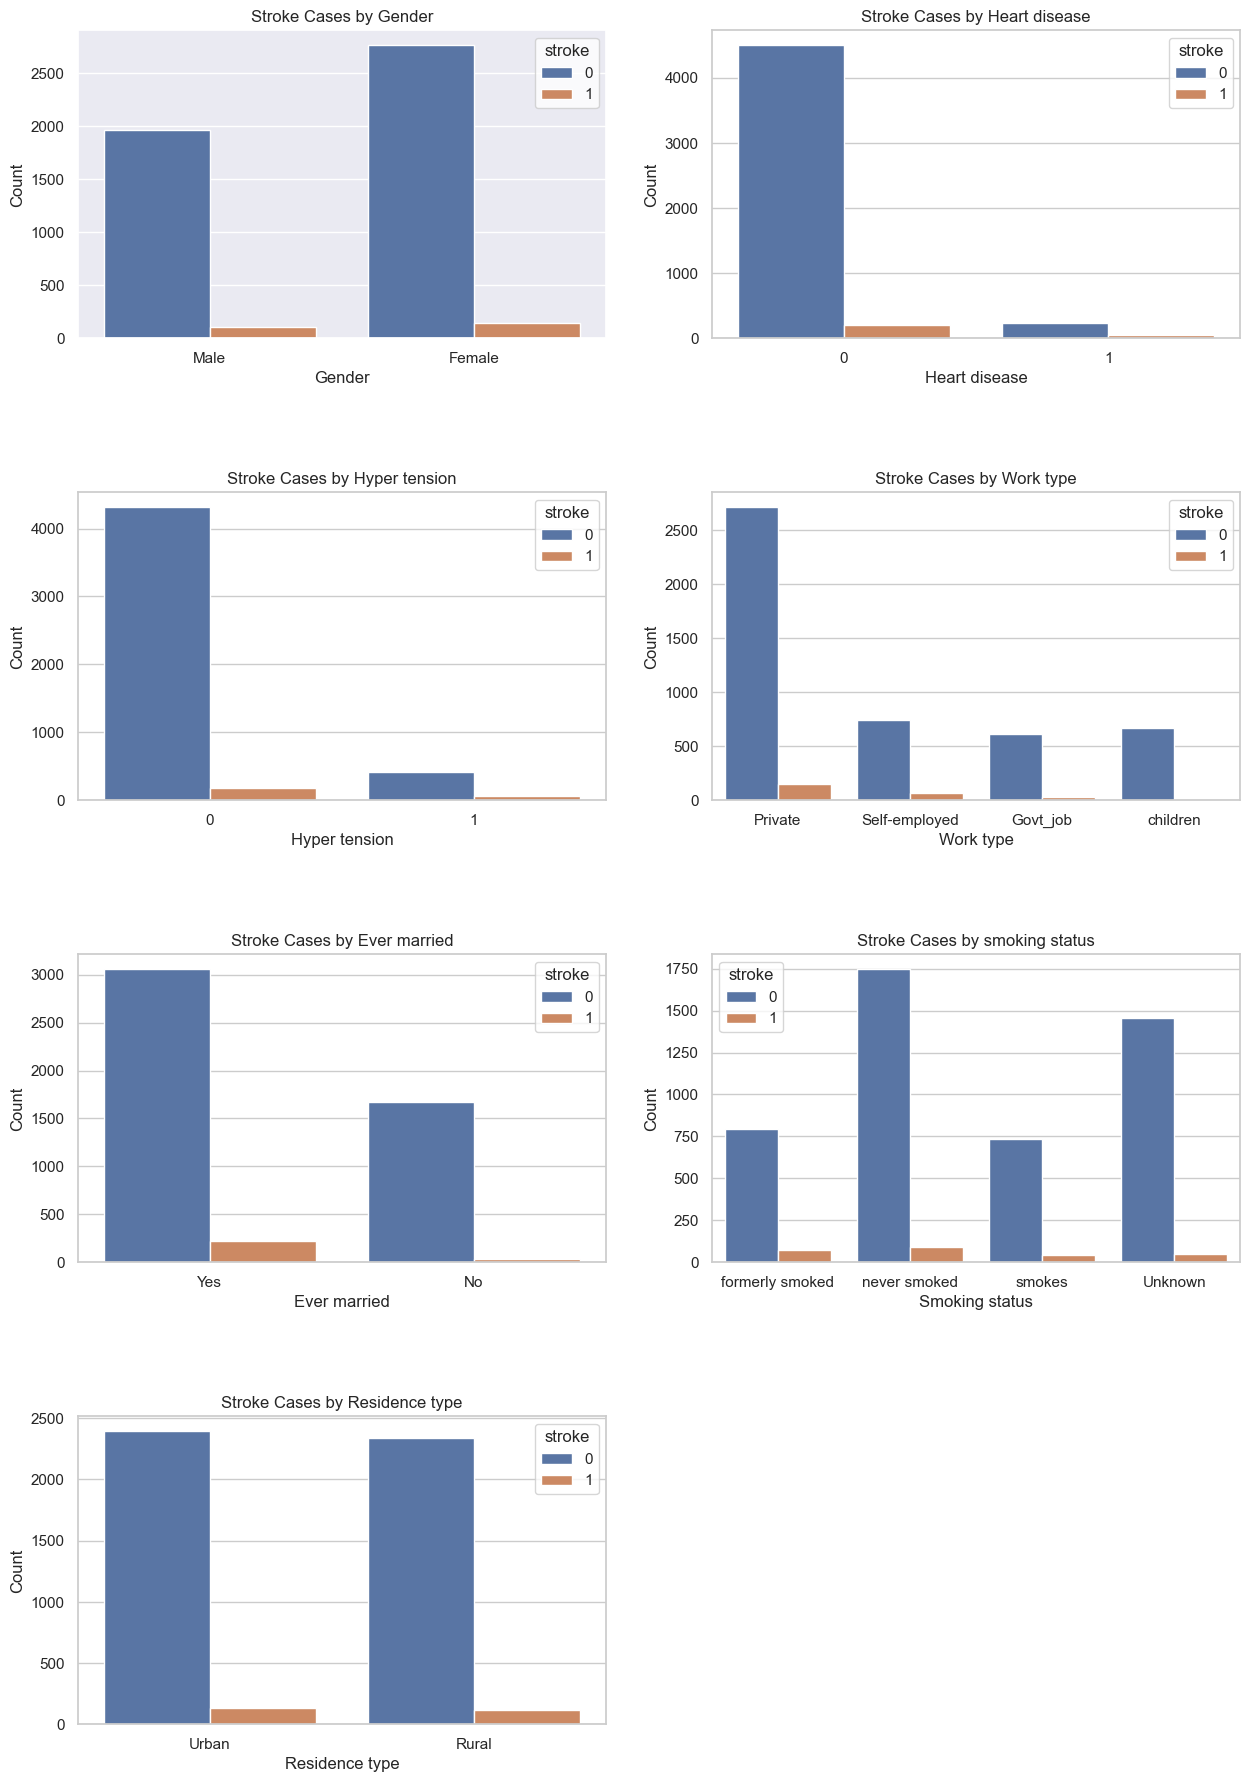

In [139]:
df1 = pd.read_csv(url)
plt.figure(figsize=(15, 40))
plt.subplots_adjust(hspace=0.5)
plt.subplot(7,2,1)
sns.set_theme(style="whitegrid")
sns.countplot(x=df1['gender'], hue=df1['stroke'])
plt.title('Stroke Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(7,2,2)
sns.countplot(x=df1['heart_disease'], hue=df1['stroke'])
plt.title('Stroke Cases by Heart disease')
plt.xlabel('Heart disease')
plt.ylabel('Count')

plt.subplot(7,2,3)
sns.countplot(x=df1['hypertension'], hue=df1['stroke'])
plt.title('Stroke Cases by Hyper tension')
plt.xlabel('Hyper tension')
plt.ylabel('Count')

plt.subplot(7,2,4)
sns.countplot(x=df1['work_type'], hue=df1['stroke'])
plt.title('Stroke Cases by Work type')
plt.xlabel('Work type')
plt.ylabel('Count')

plt.subplot(7,2,5)
sns.countplot(x=df1['ever_married'], hue=df1['stroke'])
plt.title('Stroke Cases by Ever married')
plt.xlabel('Ever married')
plt.ylabel('Count')

plt.subplot(7,2,6)
sns.countplot(x=df1['smoking_status'], hue=df1['stroke'])
plt.title('Stroke Cases by smoking status')
plt.xlabel('Smoking status')
plt.ylabel('Count')

plt.subplot(7,2,7)
sns.countplot(x=df1['Residence_type'], hue=df1['stroke'])
plt.title('Stroke Cases by Residence type')
plt.xlabel('Residence type')
plt.ylabel('Count')


From the countplots, we can see that count of stoke cases is not directly relating to any specific feature column.

In [140]:
import plotly.graph_objs as go
trace = go.Scatter3d(
    x=df['age'],
    y=df['bmi'],
    z= df['avg_glucose_level'],
    mode='markers',
    marker=dict(
        size=4,
        color=df['stroke'],
        colorscale='Viridis',
        opacity=1
    )
)
layout = go.Layout(
    scene=dict(
        xaxis_title='Age',
        yaxis_title='BMI',
        zaxis_title='Avg Glucose Level'
    ),
    title='3D Plot of Age, BMI, and Glucose Level vs. Stroke'
)
fig = go.Figure(data=[trace], layout=layout)
fig.show()

From the plot, we can have the following inferences:


1.   Old age people (age>60) have more chances of a brain stroke.  
2.   BMI does not seem to have a correlation with brain stroke, as people from all range of BMI have seem to suffer from brain stroke.
3. Same goes for Glucose level as it also does not have a straight relation with stroke.  



<Axes: >

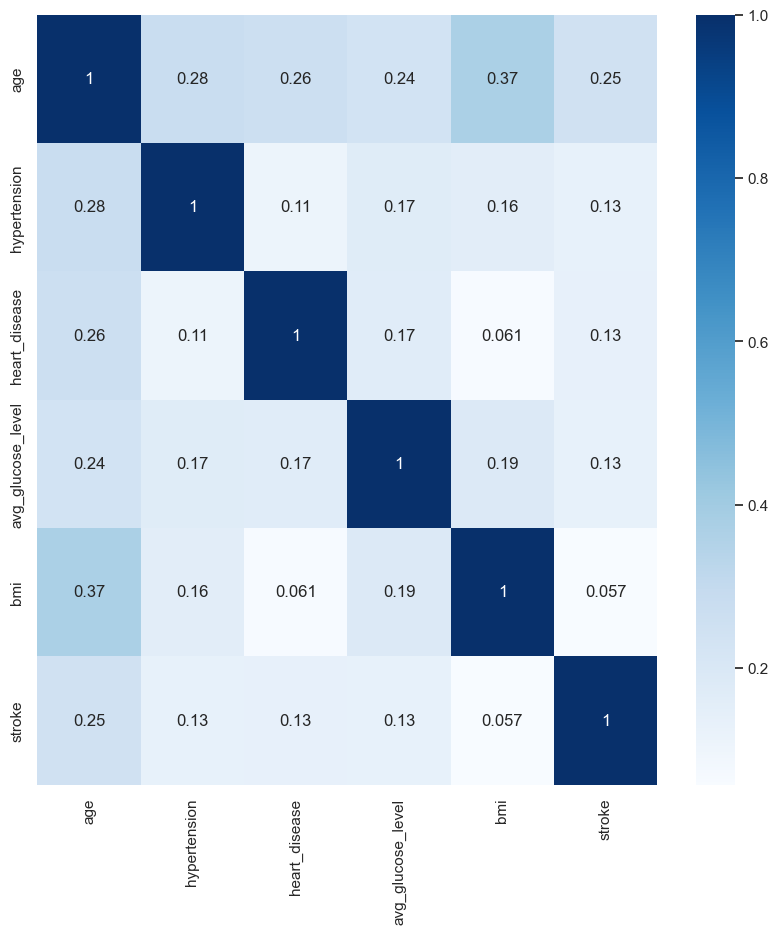

In [141]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, cmap = "Blues")

In [142]:
print(df.corr()['stroke'].abs().sort_values(ascending=False))

stroke               1.000000
age                  0.246478
heart_disease        0.134610
avg_glucose_level    0.133227
hypertension         0.131965
bmi                  0.056926
Name: stroke, dtype: float64


From the correlation plot, we can have the following inferences:


1.   Age has the highest correlation with stroke. As also seen from other kinds of plots that people of age>60 have higher chance of suffering from stroke.
2.  All other features do not seem to have a correlation with stroke.
3. Also, BMI and age have some correlation, meaning people of old age have a greater bmi.



0    4733
1     248
Name: stroke, dtype: int64


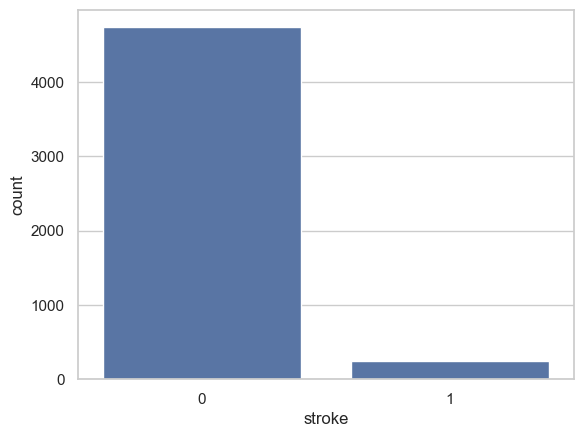

In [143]:
print(df['stroke'].value_counts())
ax = sns.countplot(data=df, x="stroke")
plt.show()

From the plot, we can see that we have only 248 datapoints of positive class i.e, only 4.98% of datapoints belong to positive class.
Hence, ,this is a highly unbalanced data distribution and we would have to do oversampling to obtain good results on the dataset.

Text(0.5, 1.0, 'Propagation of bmi by smoking_status')

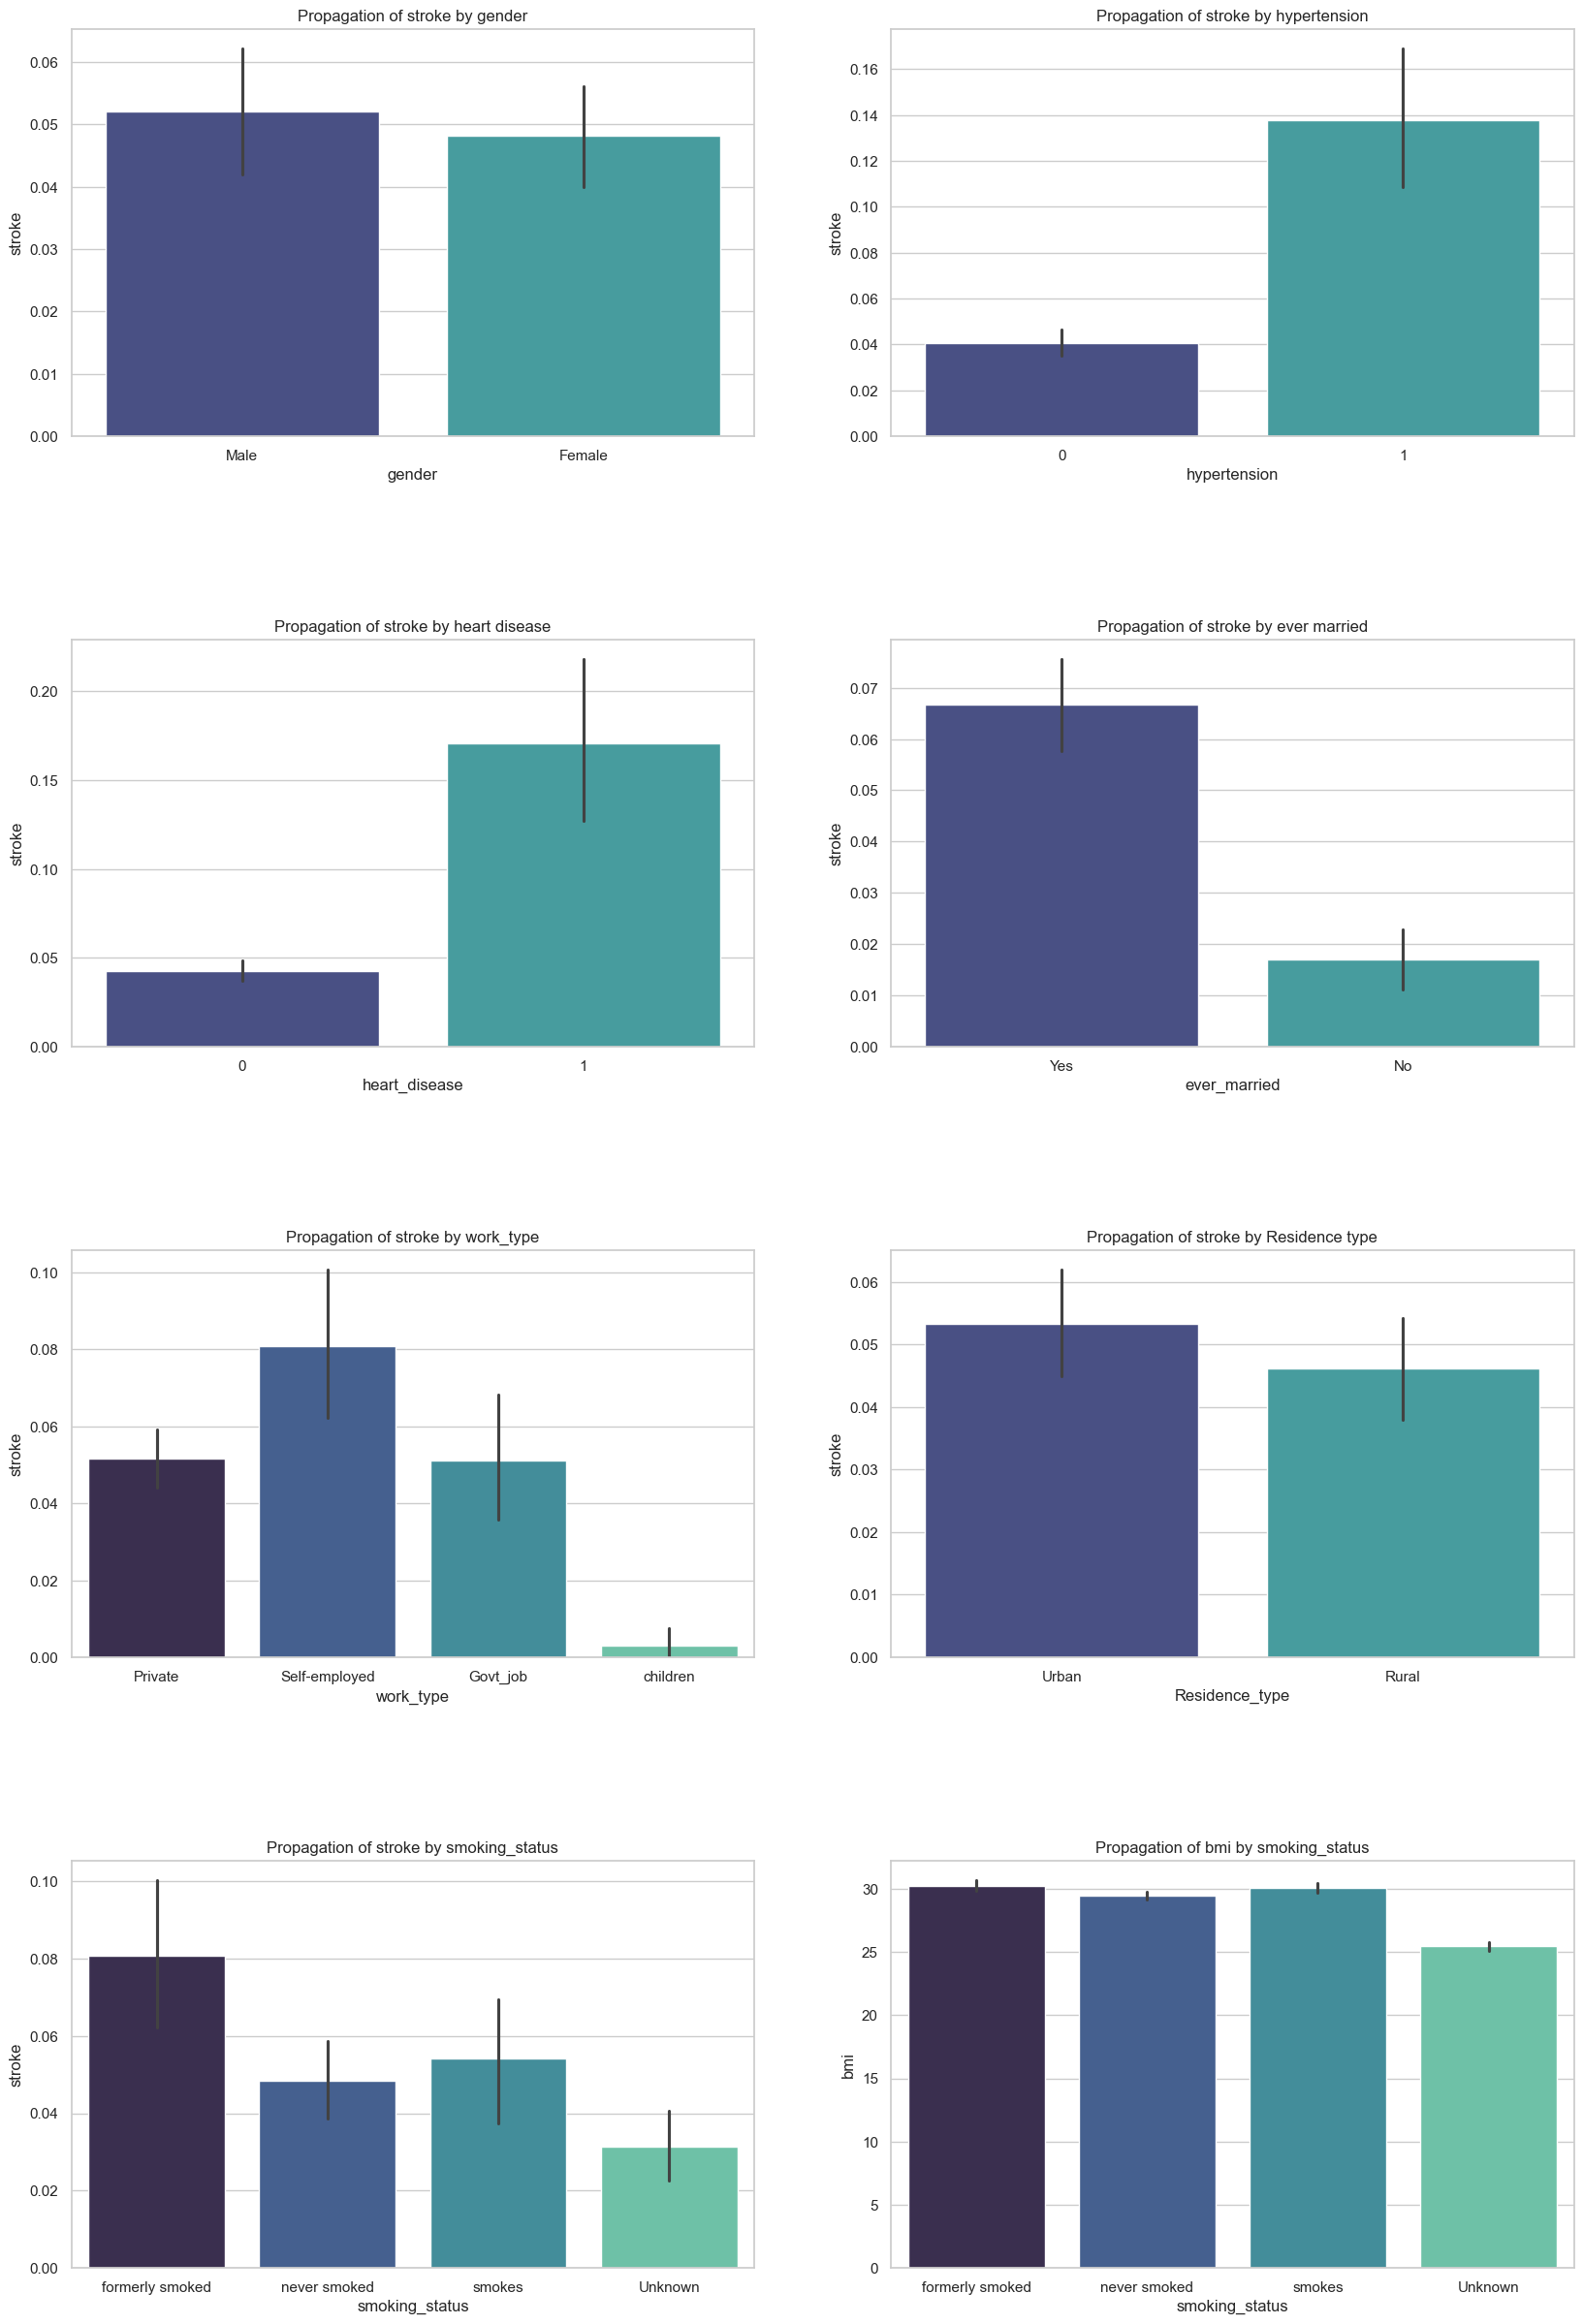

In [144]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 30))
fig.subplots_adjust(hspace=0.5)
sns.barplot(data=df, x='gender', y='stroke', palette='mako', ax=axs[0,0])
axs[0,0].set_title('Propagation of stroke by gender')
sns.barplot(data=df, x='hypertension', y='stroke', palette='mako', ax=axs[0,1])
axs[0,1].set_title('Propagation of stroke by hypertension')
sns.barplot(data=df, x='heart_disease', y='stroke', palette='mako', ax=axs[1,0])
axs[1,0].set_title('Propagation of stroke by heart disease')
sns.barplot(data=df, x='ever_married', y='stroke', palette='mako', ax=axs[1,1])
axs[1,1].set_title('Propagation of stroke by ever married')
sns.barplot(data=df, x='work_type', y='stroke', palette='mako', ax=axs[2,0])
axs[2,0].set_title('Propagation of stroke by work_type')
sns.barplot(data=df, x='Residence_type', y='stroke', palette='mako', ax=axs[2,1])
axs[2,1].set_title('Propagation of stroke by Residence type')
sns.barplot(data=df, x='smoking_status', y='stroke', palette='mako', ax=axs[3,0])
axs[3,0].set_title('Propagation of stroke by smoking_status')
sns.barplot(data=df, x='smoking_status', y='bmi', palette='mako', ax=axs[3,1])
axs[3,1].set_title('Propagation of bmi by smoking_status')

From the plots, we have the following inferences:


1.   Both gender have almost similar chances of suffering from stroke. It is not skewed to any specific gender. Same goes for Residence (urban-rural) and work type.  
2.  People with hypertension, heart disease tend to have a higher chance of a brain stroke as they have more cases of stroke.
3. We cannot infer anything from ever-married feature as of now,but one can guess that people who are not married would be of less age than people who are married, hence married people have more chances of stroke.  



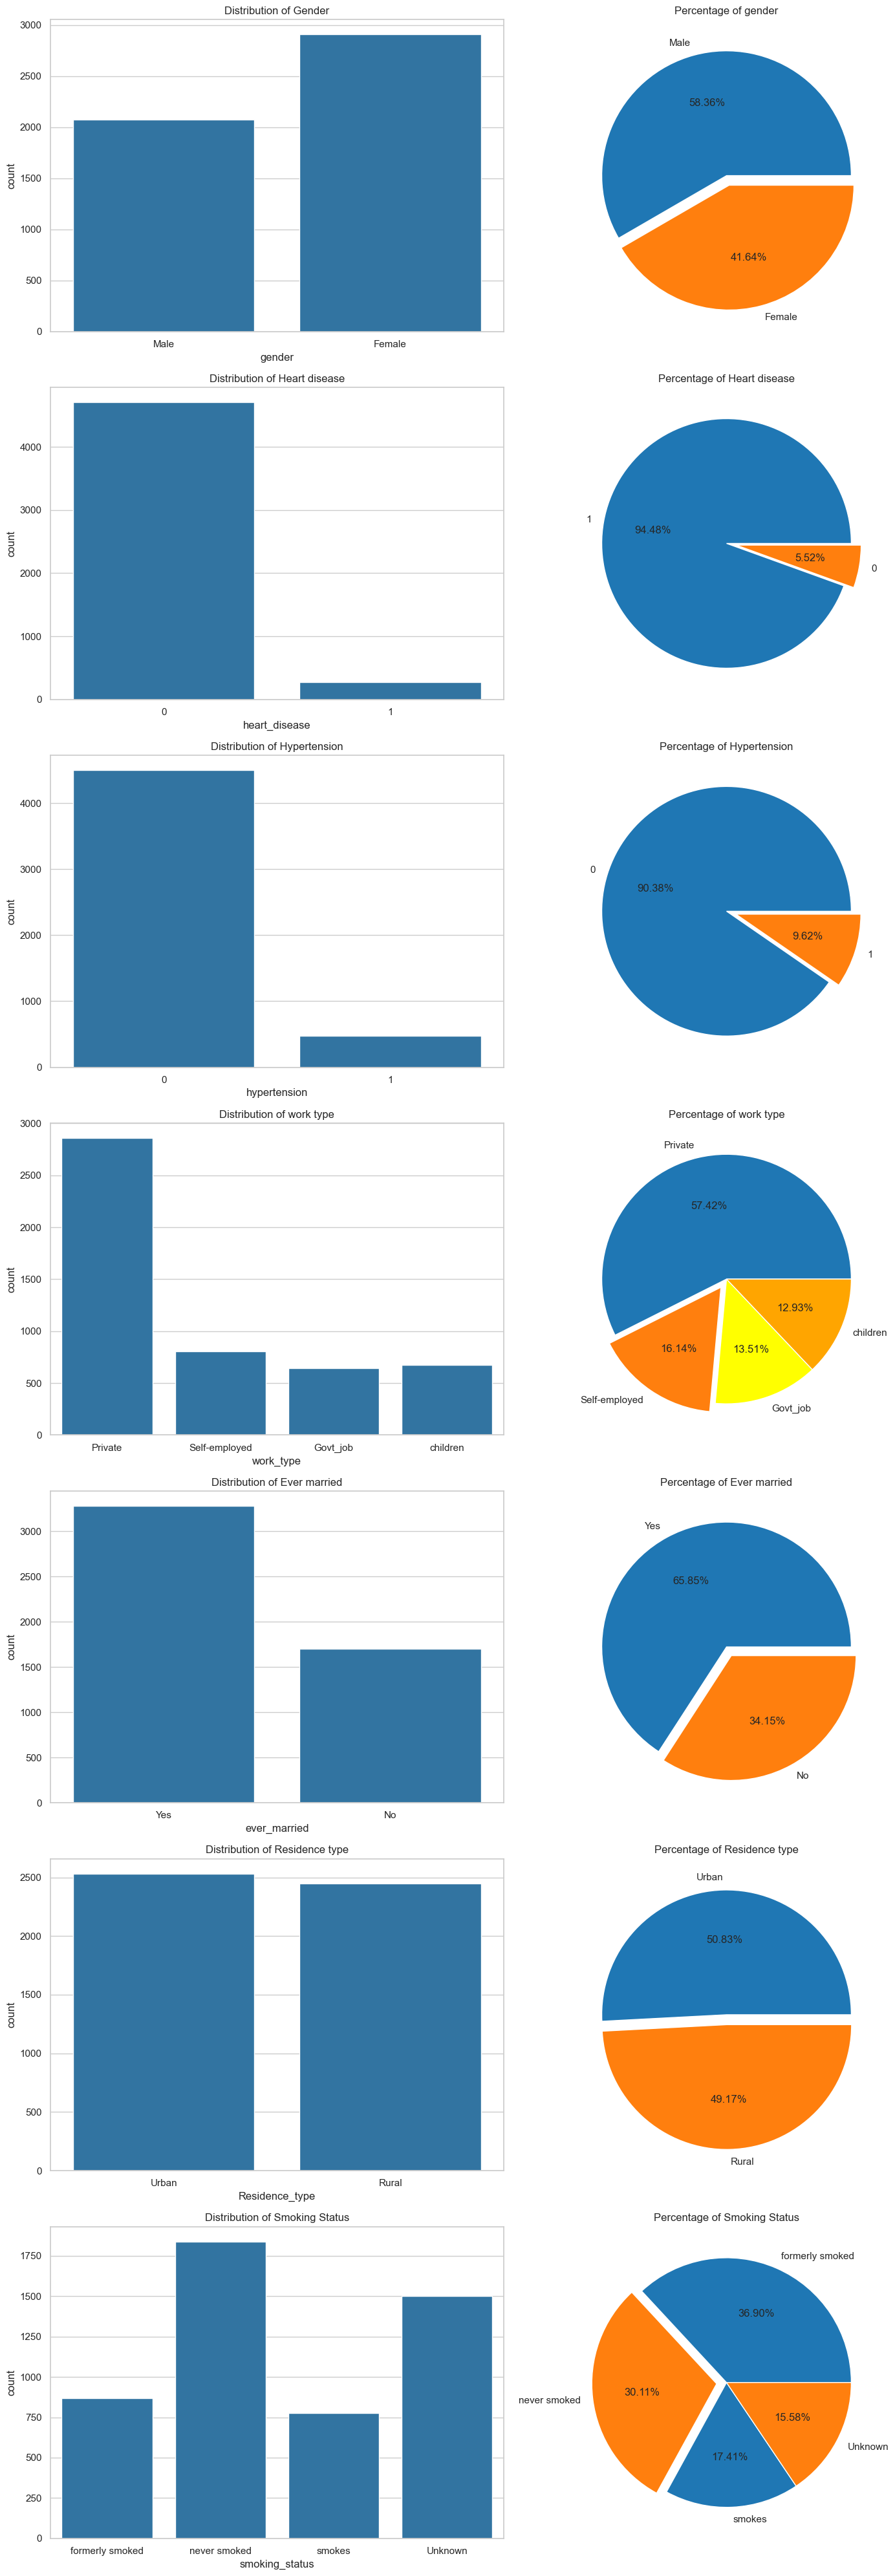

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 40))
plt.subplots_adjust(hspace=0.5)

plt.subplot(7, 2, 1)
sns.countplot(x=df['gender'], data=df, color='tab:blue')
plt.title('Distribution of Gender')

plt.subplot(7, 2, 2)
counter = df.gender.unique()
colors = ['tab:blue', 'tab:orange']
plt.pie(x=df['gender'].value_counts(), labels=counter, explode=(0, 0.08), autopct='%1.2f%%', colors=colors)
plt.title('Percentage of gender')

plt.subplot(7, 2, 3)
sns.countplot(x=df['heart_disease'], data=df, color='tab:blue')
plt.title('Distribution of Heart disease')

plt.subplot(7, 2, 4)
counter = df.heart_disease.unique()
colors = ['tab:blue', 'tab:orange']
plt.pie(x=df['heart_disease'].value_counts(), labels=counter, explode=(0, 0.08), autopct='%1.2f%%', colors=colors)
plt.title('Percentage of Heart disease')

plt.subplot(7, 2, 5)
sns.countplot(x=df['hypertension'], data=df, color='tab:blue')
plt.title('Distribution of Hypertension')

plt.subplot(7, 2, 6)
counter = df.hypertension.unique()
colors = ['tab:blue', 'tab:orange']
plt.pie(x=df['hypertension'].value_counts(), labels=counter, explode=(0, 0.08), autopct='%1.2f%%', colors=colors)
plt.title('Percentage of Hypertension')

plt.subplot(7, 2, 7)
sns.countplot(x=df['work_type'], data=df, color='tab:blue')
plt.title('Distribution of work type')

plt.subplot(7, 2, 8)
counter = df.work_type.unique()
colors = ['tab:blue', 'tab:orange', 'yellow', 'orange']
plt.pie(x=df['work_type'].value_counts(), labels=counter, explode=(0, 0.08, 0, 0), autopct='%1.2f%%', colors=colors)
plt.title('Percentage of work type')

plt.subplot(7, 2, 9)
sns.countplot(x=df['ever_married'], data=df, color='tab:blue')
plt.title('Distribution of Ever married')

plt.subplot(7, 2, 10)
counter = df.ever_married.unique()
colors = ['tab:blue', 'tab:orange']
plt.pie(x=df['ever_married'].value_counts(), labels=counter, explode=(0, 0.08), autopct='%1.2f%%', colors=colors)
plt.title('Percentage of Ever married')

plt.subplot(7, 2, 11)
sns.countplot(x=df['Residence_type'], data=df, color='tab:blue')
plt.title('Distribution of Residence type')

plt.subplot(7, 2, 12)
counter = df.Residence_type.unique()
colors = ['tab:blue', 'tab:orange']
plt.pie(x=df['Residence_type'].value_counts(), labels=counter, explode=(0, 0.08), autopct='%1.2f%%', colors=colors)
plt.title('Percentage of Residence type')

plt.subplot(7,2,13)
sns.countplot(x = df['smoking_status'], data = df, color='tab:blue')
plt.title('Distribution of Smoking Status')
plt.subplot(7,2,14)
counter = df.smoking_status.unique()
colors = ['tab:blue', 'tab:orange']
plt.pie(x= df['smoking_status'].value_counts(), labels = counter, explode = (0, 0.08, 0, 0), autopct = '%1.2f%%',colors=colors)
plt.title('Percentage of Smoking Status')


plt.tight_layout()
plt.show()


This plot shows the data-distribution of each feature set.

Interestingly, we have very less no. of people suffering from disease like hypertension and heart disease and in the dataset, we have more no. of females than males.

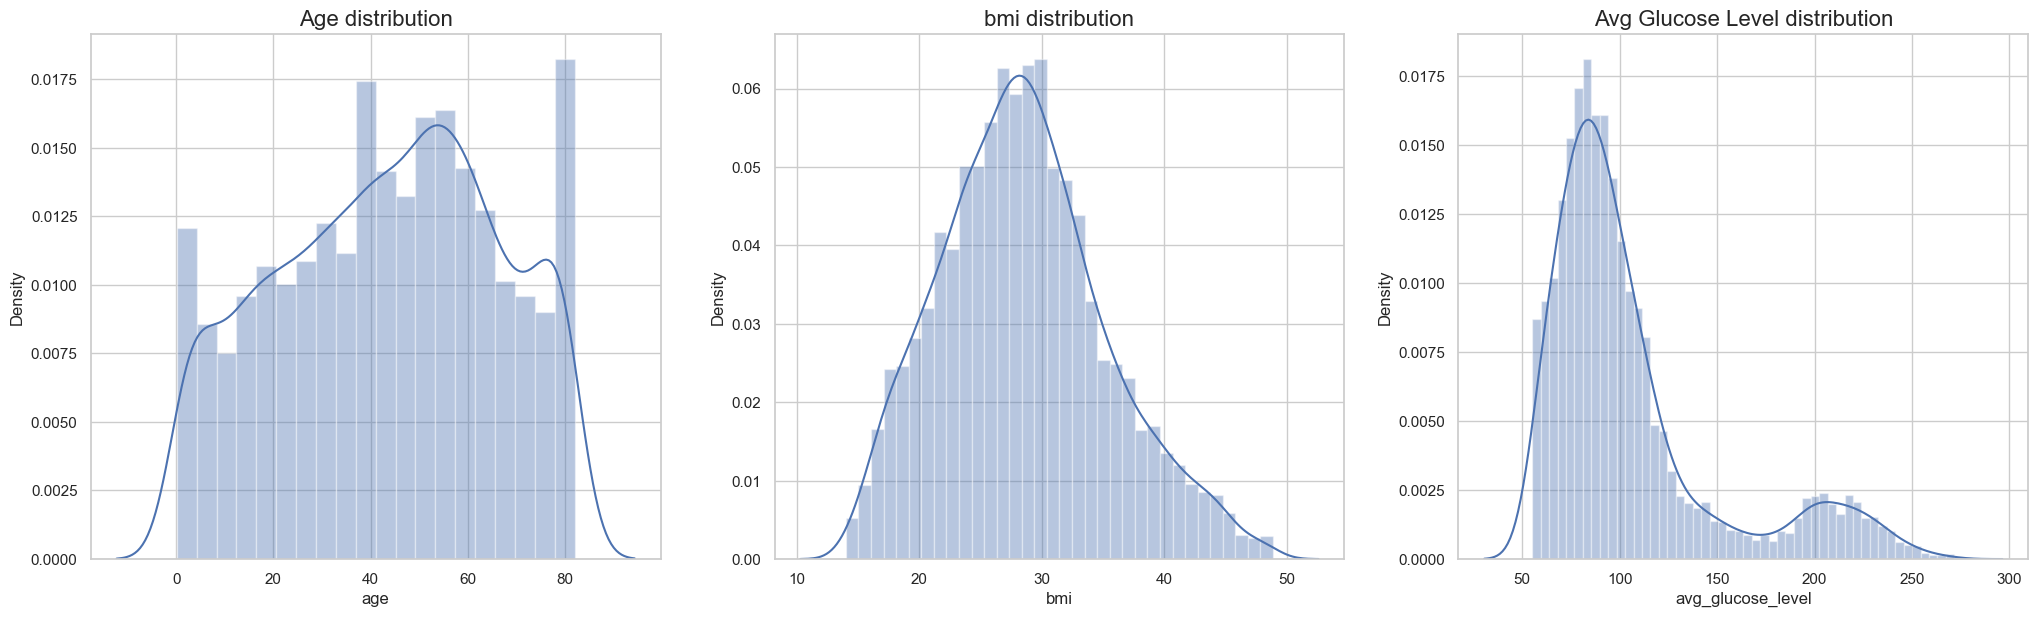

In [146]:
plt.figure(figsize = (25, 15))
plt.subplot(2, 3, 1)
axis1 = sns.distplot(df['age'])
axis1.set_title('Age distribution', fontdict={'fontsize': 16})


plt.subplot(2, 3, 2)
axis1 = sns.distplot(df['bmi'])
axis1.set_title('bmi distribution', fontdict={'fontsize': 16})


plt.subplot(2, 3, 3)
axis = sns.distplot(df['avg_glucose_level'])
axis.set_title('Avg Glucose Level distribution', fontdict={'fontsize': 16})
plt.show()


Plotting for continuous features, we have the following inferences:

1. The age feature is broadly spread, this means we have many people of each age group.
2. BMI has a gaussian curve with most people having bmi around 25-30, which is slightly worrying (not for our calculations) as bmi>25 means overweight. This means most of the people whose data was taken in the dataset were probably overweight.

In [147]:
from pandas_profiling import ProfileReport as PR
profile = PR(
    df,
    title="Stroke Dataset Report",
    dark_mode=False,
    progress_bar=False,
    explorative=True,
    plot={"correlation": {"cmap": "coolwarm", "bad": "#000000"}}
)

profile.to_notebook_iframe()

PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.10/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.10/u/import-error

# Preprocessing

Finding columns which are of object type for Encoding

In [ ]:
object_cols = df.select_dtypes(include=['object']).columns
print("Columns of object type:", object_cols)

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [ ]:
for x in object_cols:
  df[x]=LE.fit_transform(df[x])

In [ ]:
df[object_cols].head()

## Splitting the data into X and Y

In [ ]:
Y=df['stroke']
X=df.drop('stroke',axis=1)
X.head()

We can see that all the object-type columns are converted to integer type via label encoding.

## Splitting data into train and test set.

In [ ]:
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(X, Y, test_size= 0.3, random_state= 11,shuffle=True,stratify=Y)

In [ ]:
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()

In [ ]:
len(y_test==1)

# Data Transformation

## Oversampling using SMOTE

In [ ]:
df[df['stroke']==0]

In [ ]:
df[df['heart_disease']==0]

In [ ]:
df[df['stroke']==1]

As is apparent from above, amount data for class 1 under 'stroke' is significantly less than the data for class 0

In [ ]:
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import RandomOverSampler
# from imblearn.over_sampling import ADASYN

smote_nc = SMOTENC(categorical_features=[0,2,3,4,5,6,9], random_state=0)
# smote_nc = RandomOverSampler(random_state=42)
# smote_nc = SMOTE( random_state=0)
# smote_nc=ADASYN(random_state=0)
X_resampled, Y_resampled = smote_nc.fit_resample(x_train, y_train)
SMOTE_df=pd.DataFrame(np.c_[X_resampled,Y_resampled],columns=df.columns)

In [ ]:
SMOTE_df[SMOTE_df['stroke']==0]

In [ ]:
SMOTE_df[SMOTE_df['stroke']==1]

## Feature Selection

In [ ]:
from sklearn.feature_selection import mutual_info_classif
plt.rcParams["figure.figsize"] = (10,3)
ranking=mutual_info_classif(SMOTE_df.drop('stroke',axis=1),SMOTE_df['stroke'])
df_rank=pd.Series(ranking,SMOTE_df.columns[:-1])
df_rank.plot(kind='barh',color='teal')
plt.title('Information Gain')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=340)

model.fit(SMOTE_df.drop('stroke',axis=1),SMOTE_df['stroke'])

importances = model.feature_importances_

final_df = pd.DataFrame({ "Features": pd.DataFrame(SMOTE_df.drop('stroke',axis=1)).columns,"Importances":importances})
final_df.set_index("Importances")


final_df=final_df.sort_values('Importances')

final_df.set_index('Features', inplace=True)
final_df.plot(kind='barh', color='teal')
ax = plt.gca()
ax.set_ylabel('')
plt.title('Random Forest Importance')
plt.show()



With reference to the above two plots, we select the following feature set:

{age,avg_glucose_level,bmi,work_type,smoking_status,ever_married}

In [ ]:
df_selected=SMOTE_df[["age","avg_glucose_level","bmi","work_type","smoking_status","ever_married",'stroke']]
X_resampled,Y_resampled=df_selected[["age","avg_glucose_level","bmi","work_type","smoking_status","ever_married"]],df_selected[['stroke']]
x_test=x_test[["age","avg_glucose_level","bmi","work_type","smoking_status","ever_married"]]

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled= sc.fit_transform(X_resampled)
X_scaled_test= sc.fit_transform(x_test)
xsc=sc.fit_transform(x_train)
X_scaled.shape

It scaled the dataset and also changed the dataframe to numpy array.

In [ ]:
if isinstance(Y, pd.Series):
    Y = Y.to_numpy()
Y

This changes the series Y to a numpy array to keep both X and Y as numpy arrays.

## PCA Transform

In [ ]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components = 6)
pca_model.fit(X_scaled)
eigenvalue = pca_model.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(eigenvalue)

comps=np.arange(0,len(eigenvalue),1)

# plt.subplot(1, 2, 1)
sns.barplot(x=comps+1, y=eigenvalue, palette='Set1')
sns.set_style('whitegrid')
plt.title('Explained Variance Ratio v/s Features Graph')
plt.xlabel('Features')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [ ]:
# plt.subplot(1, 2, 2)
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(comps, cum_sum_eigenvalues, 'r--', linewidth=2)
sns.barplot(x=comps+1, y=cum_sum_eigenvalues, palette='Set1')
plt.title('Cumulative sum of variance explained v/s number of features')
plt.xlabel('Number of features')
plt.ylabel('Cum-sum of variance explained')
plt.show()

In [ ]:
cum_sum_eigenvalues[4]

Explained variance for n_features=5 is 94.91%

In [ ]:
pca_model = PCA(n_components = 5)
PCA_X = pca_model.fit_transform(X_scaled)
PCA_X_test = pca_model.fit_transform(x_test)

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)
plt.scatter(PCA_X[:, 3], PCA_X[:, 4], c=Y_resampled.to_numpy(), s=5, cmap='plasma')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Plotting the transformed data')
plt.colorbar()
plt.show()

## LDA Transform

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model=LinearDiscriminantAnalysis()
# lda_model.fit(X,Y)
LDA_X = lda_model.fit_transform(X_resampled,Y_resampled)
LDA_X_test = lda_model.fit_transform(x_test,y_test)

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)
plt.scatter(LDA_X[:, 0], LDA_X[:, 0], c=Y_resampled.to_numpy(), s=5, cmap='plasma')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Plotting the transformed data')
plt.colorbar()
plt.show()

In [ ]:
# clf=RandomForestClassifier(criterion='gini',max_depth=8)
clf=DecisionTreeClassifier(criterion='gini',max_depth=5)
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
clf.fit(LDA_X,Y_resampled)
y_pred=clf.predict(LDA_X_test)
# y_pred = cross_val_predict(clf, LDA_X_test, y_test, cv=5)
conf_mat = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

In [ ]:
conf_mat

## t-SNE

In [ ]:
from sklearn.manifold import TSNE
from scipy.spatial.distance import pdist, squareform
tsne_model = TSNE(n_components=3)
tsne_X = tsne_model.fit_transform(X_resampled)
tsne_X_test = tsne_model.fit_transform(x_test)
varience_explained = np.sum(tsne_model.kl_divergence_) / np.prod(tsne_X.shape)
print(varience_explained)
distances = squareform(pdist(tsne_X))
embedding_var = np.var(distances)

In [ ]:
plt.scatter(tsne_X[:,0],tsne_X[:,1], c=Y_resampled.to_numpy(), s=25, cmap='plasma')
plt.title('Plotting the data between two features')
plt.xlabel('feature 1')
plt.colorbar()
plt.ylabel('feature 2')
plt.show()

# Model Training and testing

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression

## 1. DTC

In [ ]:
# Using grid search to find the best hyperparameters
dtc=DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10,15,17,20,22,23,25,27,30,34,37,40],
    'min_samples_split': [1,4, 6, 8, 10]
}


grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5)
grid_search.fit(X_resampled, Y_resampled)
print("Best hyperparameters:", grid_search.best_params_)

best_dtc = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'],max_depth=grid_search.best_params_['max_depth'], min_samples_split=grid_search.best_params_['min_samples_split'])
best_dtc.fit(X_resampled, Y_resampled)

y_pred_best_params = best_dtc.predict(x_test)


In [ ]:
#@title LDA dataset

dtc=DecisionTreeClassifier(criterion='gini',max_depth=30,min_samples_split=4)
dtc.fit(LDA_X,Y_resampled)
bpr=dtc.predict(LDA_X_test)
conf_mat = confusion_matrix(y_test, bpr)
print(classification_report(y_test, bpr),'\n')
print(conf_mat)

In [ ]:
#@title PCA dataset

dtc=DecisionTreeClassifier(criterion='gini',max_depth=15,min_samples_split=4)
dtc.fit(PCA_X,Y_resampled)
bpr=dtc.predict(PCA_X_test)
conf_mat = confusion_matrix(y_test, bpr)
print(classification_report(y_test, bpr),'\n')
print(conf_mat)

In [ ]:
#@title tsne dataset

dtc=DecisionTreeClassifier()
dtc.fit(tsne_X,Y_resampled)
bpr=dtc.predict(tsne_X_test)
conf_mat = confusion_matrix(y_test, bpr)
print(classification_report(y_test, bpr),'\n')
print(conf_mat)

In [ ]:
#@title untransformed dataset

dtc=DecisionTreeClassifier(criterion='entropy',max_depth=37,min_samples_split=8)
dtc.fit(X_resampled,Y_resampled)
bpr=dtc.predict(x_test)
conf_mat = confusion_matrix(y_test, bpr)
print(classification_report(y_test, bpr),'\n')
print(conf_mat)

## 2. Bagging classifier

In [ ]:
#@title tsne dataset
estimators = [('xgb', XGBClassifier()),
              ('lr', LogisticRegression())]

ensemble = VotingClassifier(estimators)

bagging_model = BaggingClassifier(base_estimator=ensemble, n_estimators=50, random_state=42)

bagging_model.fit(tsne_X,Y_resampled)
bpr=bagging_model.predict(tsne_X_test)
conf_mat = confusion_matrix(y_test, bpr)
print(classification_report(y_test, bpr),'\n')
print(conf_mat)

In [ ]:
estimators = [('svm',SVC(kernel='sigmoid',C=3)),
              ('xgb', XGBClassifier()),
              ('lr', LogisticRegression())]

ensemble = VotingClassifier(estimators)

bagging_model = BaggingClassifier(base_estimator=ensemble, n_estimators=50, random_state=42)

bagging_model.fit(tsne_X,Y_resampled)
bpr=bagging_model.predict(tsne_X_test)
conf_mat = confusion_matrix(y_test, bpr)
print(classification_report(y_test, bpr),'\n')
print(conf_mat)

In [ ]:
#@title LDA dataset
estimators = [('svm',SVC(kernel='sigmoid',C=3)),
              ('xgb', XGBClassifier()),
              ('lr', LogisticRegression())]

ensemble = VotingClassifier(estimators)

bagging_model = BaggingClassifier(base_estimator=ensemble, n_estimators=50, random_state=42)

bagging_model.fit(LDA_X,Y_resampled)
bpr=bagging_model.predict(LDA_X_test)
conf_mat = confusion_matrix(y_test, bpr)
print(classification_report(y_test, bpr),'\n')
print(conf_mat)

In [ ]:
#@title PCA dataset
estimators = [('svm',SVC(kernel='sigmoid',C=3)),
              ('xgb', XGBClassifier()),
              ('lr', LogisticRegression())]

ensemble = VotingClassifier(estimators)

bagging_model = BaggingClassifier(base_estimator=ensemble, n_estimators=50, random_state=42)

bagging_model.fit(PCA_X,Y_resampled)
bpr=bagging_model.predict(PCA_X_test)
conf_mat = confusion_matrix(y_test, bpr)
print(classification_report(y_test, bpr),'\n')
print(conf_mat)

In [ ]:
#@title untransformed data
estimators = [('svm',SVC(kernel='sigmoid',C=3)),
              ('xgb', XGBClassifier()),
              ('lr', LogisticRegression())]

ensemble = VotingClassifier(estimators)

bagging_model = BaggingClassifier(base_estimator=ensemble, n_estimators=50, random_state=42)

bagging_model.fit(SMOTE_df[['age','ever_married','work_type','bmi','avg_glucose_level']],SMOTE_df['stroke'])
bpr=bagging_model.predict(x_test[['age','ever_married','work_type','bmi','avg_glucose_level']])
conf_mat = confusion_matrix(y_test, bpr)
print(classification_report(y_test, bpr),'\n')
print(conf_mat)

## 3. Random Forest classifier

In [ ]:
#@title LDA dataset

dtc=RandomForestClassifier(criterion='log_loss')
dtc.fit(LDA_X,Y_resampled)
bpr=dtc.predict(LDA_X_test)
conf_mat = confusion_matrix(y_test, bpr)
print(classification_report(y_test, bpr),'\n')
print(conf_mat)

In [ ]:
#@title tsne dataset

dtc=RandomForestClassifier(criterion='log_loss')
dtc.fit(tsne_X,Y_resampled)
bpr=dtc.predict(tsne_X_test)
conf_mat = confusion_matrix(y_test, bpr)
print(classification_report(y_test, bpr),'\n')
print(conf_mat)

In [ ]:
#@title untransformed dataset

dtc=RandomForestClassifier(criterion='log_loss',max_depth=9)
dtc.fit(X_resampled,Y_resampled)#
bpr=dtc.predict(x_test)
conf_mat = confusion_matrix(y_test, bpr)
print(classification_report(y_test, bpr),'\n')
print(conf_mat)

In [ ]:
#@title PCA dataset

dtc=RandomForestClassifier()
dtc.fit(PCA_X,Y_resampled)
bpr=dtc.predict(PCA_X_test)
conf_mat = confusion_matrix(y_test, bpr)
print(classification_report(y_test, bpr),'\n')
print(conf_mat)

## 4. Logistic Regression

In [ ]:
#@title tsne dataset


clf = LogisticRegression(random_state=42).fit(tsne_X, Y_resampled)
lpr=clf.predict(tsne_X_test)
conf_mat = confusion_matrix(y_test, lpr)
print(classification_report(y_test, lpr),'\n')
print(conf_mat)

In [ ]:
#@title untransformed data
clf = LogisticRegression().fit(X_resampled
, Y_resampled)
lpr=clf.predict(x_test)#
conf_mat = confusion_matrix(y_test, lpr)
print(classification_report(y_test, lpr),'\n')
print(conf_mat)

In [ ]:
#@title PCA data
clf = LogisticRegression(random_state=42).fit(PCA_X, Y_resampled)
ppr=clf.predict(PCA_X_test)
conf_mat = confusion_matrix(y_test, ppr)
print(classification_report(y_test, ppr),'\n')
print(conf_mat)

In [ ]:
#@title LDA data
clf = LogisticRegression(random_state=42).fit(LDA_X, Y_resampled)
dpr=clf.predict(LDA_X_test)
conf_mat = confusion_matrix(y_test, dpr)
print(classification_report(y_test, dpr),'\n')
print(conf_mat)

## 5. XGB classifier

In [ ]:
#@title LDA dataset
clf=XGBClassifier(colsample_bytree= 0.3,learning_rate= 0.1, max_depth= 5, n_estimators= 100, subsample= 1.0)
clf.fit(LDA_X,Y_resampled)
y_pred=clf.predict(LDA_X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(conf_mat)

In [ ]:
#@title tsne dataset
clf=XGBClassifier(colsample_bytree= 0.8,learning_rate= 0.1, max_depth= 10, n_estimators= 100, subsample= 0.8)
clf.fit(tsne_X,Y_resampled)
y_pred=clf.predict(tsne_X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(conf_mat)#

In [ ]:
#@title untransformed dataset
clf=XGBClassifier(colsample_bytree= 0.8,learning_rate= 0.1, max_depth= 5, n_estimators= 150, subsample= 0.8)
clf.fit(X_resampled,Y_resampled)
y_pred=clf.predict(x_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(conf_mat)

In [ ]:
#@title PCA dataset
clf=XGBClassifier(colsample_bytree= 0.8,learning_rate= 0.1, max_depth= 5, n_estimators= 150, subsample= 0.8)
clf.fit(PCA_X,Y_resampled)
y_pred=clf.predict(PCA_X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(conf_mat)

## 6. Naive Bayes classifier

In [ ]:
#@title tsne dataset
clf = GaussianNB(var_smoothing=9.111627561154887e-05)
clf.fit(tsne_X,Y_resampled)
lpr=clf.predict(tsne_X_test)
conf_mat = confusion_matrix(y_test, lpr)#
print(classification_report(y_test, lpr),'\n')
print(conf_mat)

In [ ]:
#@title LDA dataset
clf = GaussianNB(var_smoothing=0.001)
clf.fit(LDA_X,Y_resampled)
lpr=clf.predict(LDA_X_test)
conf_mat = confusion_matrix(y_test, lpr)
print(classification_report(y_test, lpr),'\n')
print(conf_mat)

In [ ]:
#@title PCA dataset
clf = GaussianNB(var_smoothing=0.05)
clf.fit(PCA_X,Y_resampled)
lpr=clf.predict(PCA_X_test)
conf_mat = confusion_matrix(y_test, lpr)
print(classification_report(y_test, lpr),'\n')
print(conf_mat)

In [ ]:
#@title untransformed dataset
clf = GaussianNB(var_smoothing=0.1)
clf.fit(tsne_X,Y_resampled)
lpr=clf.predict(tsne_X_test)
conf_mat = confusion_matrix(y_test, lpr)
print(classification_report(y_test, lpr),'\n')
print(conf_mat)

## 7. SVM classifier with various kernels

In [ ]:
#@title tsne data

clf=SVC(kernel='rbf',C=1.5)
clf.fit(tsne_X,Y_resampled)
spr=clf.predict(tsne_X_test)
conf_mat = confusion_matrix(y_test, spr)
print(classification_report(y_test, spr),'\n')
print(conf_mat)

In [ ]:
#@title PCA data

clf=SVC(kernel='sigmoid',C=2)
clf.fit(PCA_X,Y_resampled)
spr=clf.predict(PCA_X_test)
conf_mat = confusion_matrix(y_test, spr)
print(classification_report(y_test, spr),'\n')
print(conf_mat)

In [ ]:
#@title untransformed data
#
clf=SVC(kernel='rbf',C=2)
clf.fit(X_resampled,Y_resampled)
spr=clf.predict(x_test)
conf_mat = confusion_matrix(y_test, spr)
print(classification_report(y_test, spr),'\n')
print(conf_mat)

In [ ]:
#@title tsne data

clf=SVC(kernel='poly',C=5,degree=5,decision_function_shape='ovo')
clf.fit(tsne_X,Y_resampled)
spr=clf.predict(tsne_X_test)
conf_mat = confusion_matrix(y_test, spr)
print(classification_report(y_test, spr),'\n')
print(conf_mat)

In [ ]:
#@title LDA data
clf=SVC(kernel='rbf',C=2)
clf.fit(LDA_X,Y_resampled)
spr=clf.predict(LDA_X_test)
conf_mat = confusion_matrix(y_test, spr)
print(classification_report(y_test, spr),'\n')
print(conf_mat)

# Neural Network

\We have made a neural network with input layer of 100 neurons, hidden layer of 100 neurons, 20 neurons and output layer of 1 neuron.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.utils import losses_utils
from tensorflow.keras.layers import Dense

In [ ]:
loss_fn=tf.keras.losses.BinaryFocalCrossentropy(
    apply_class_balancing=True,
    alpha=0.15,
    gamma=3.0,
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction=losses_utils.ReductionV2.AUTO,
    name='binary_focal_crossentropy'
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Dense(100, input_dim = tsne_X.shape[1], activation="relu"))
model.add(Dense(100, activation="tanh"))
model.add(Dense(20,activation="tanh"))
model.add(Dense(1, activation="tanh"))

model.compile(loss=loss_fn, optimizer="adam", metrics=["accuracy"])

In [ ]:
# define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=7)

# train the model with early stopping
history = model.fit(tsne_X, Y_resampled, validation_data=(tsne_X_test, y_test), epochs=500, batch_size=64,callbacks=[early_stop] )

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,confusion_matrix
y_pred7 = model.predict(tsne_X_test)

y_final=[]
for i in y_pred7:
    if(i>=0.37):
        y_final.append(1)
    else:
        y_final.append(0)
y_final=np.array(y_final)
y_pred8=y_final

print(classification_report(y_test,y_pred8))
print(confusion_matrix(y_test,y_pred8))

In [ ]:
y_pred7

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.plot(hist['loss'], color='blue', label='Training Loss')
plt.plot(hist['val_loss'], color='orange', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss variation with epochs')
plt.legend(loc='upper left')
plt.show()

From train loss and test loss vs epoch graph, we can see that as the val loss slowly starts to increase,the model stops as we had put early stopping in the model. This shows the benefit of early stopping to avoid overfitting in training the neural network.

# Results and Analysis

We plotted the best scores for each classifier.

## 1. Accuracy score

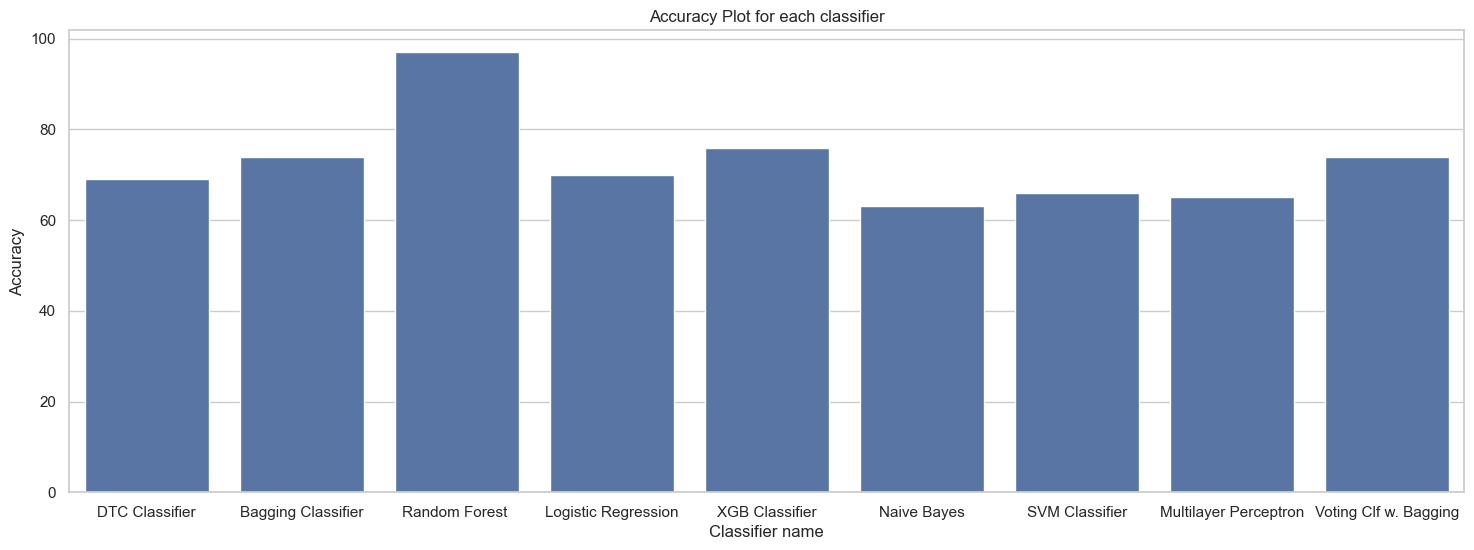

In [129]:
plt.figure(figsize=(18,6))
plt.title('Accuracy Plot for each classifier')
name_arr=['DTC Classifier','Bagging Classifier','Random Forest ','Logistic Regression','XGB Classifier','Naive Bayes','SVM Classifier','Multilayer Perceptron','Voting Clf w. Bagging']
acc_arr=[69,74,97,70,76,63,66,65,74]
sns.barplot(x=name_arr,y=acc_arr)

plt.xlabel('Classifier name')
plt.ylabel('Accuracy')

plt.show()

## 2. F1- Score (of +ve class)

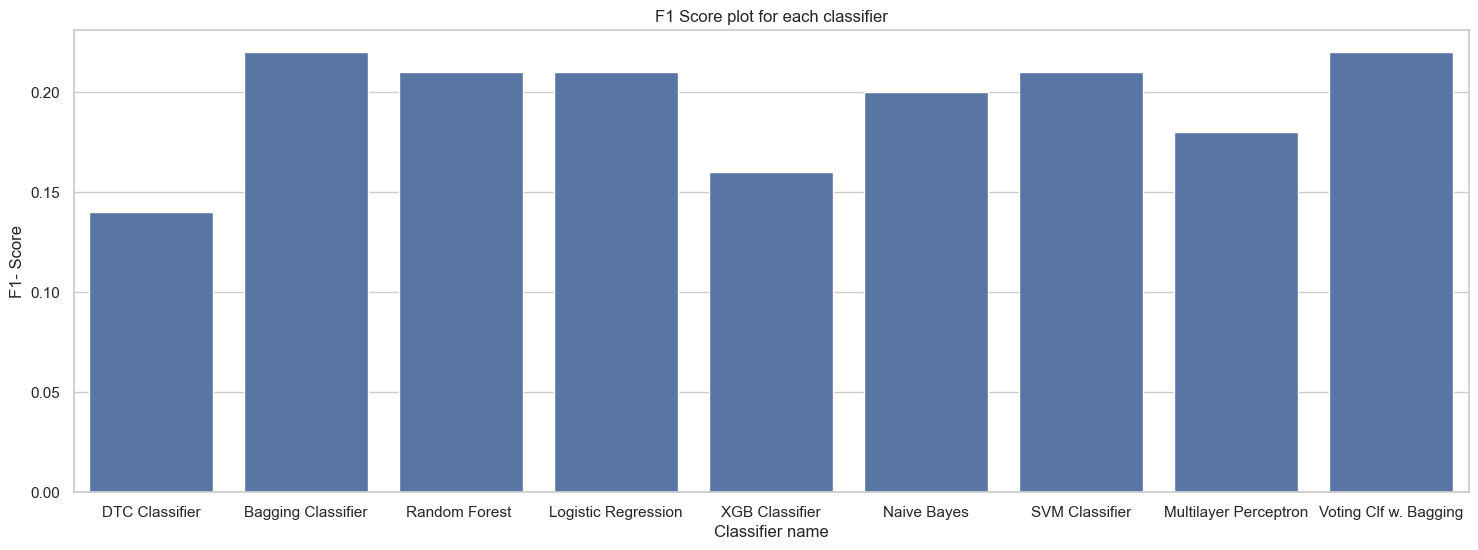

In [110]:
plt.figure(figsize=(18,6))
plt.title('F1 Score plot for each classifier')
name_arr=['DTC Classifier','Bagging Classifier','Random Forest ','Logistic Regression','XGB Classifier','Naive Bayes','SVM Classifier','Multilayer Perceptron','Voting Clf w. Bagging']
f1_sc=[0.14,0.22,0.21,0.21,0.16,0.2,0.21,0.18,0.22]

sns.barplot(x=name_arr,y=f1_sc)

plt.xlabel('Classifier name')
plt.ylabel('F1- Score')

plt.show()

## 3. Recall (of +ve class)

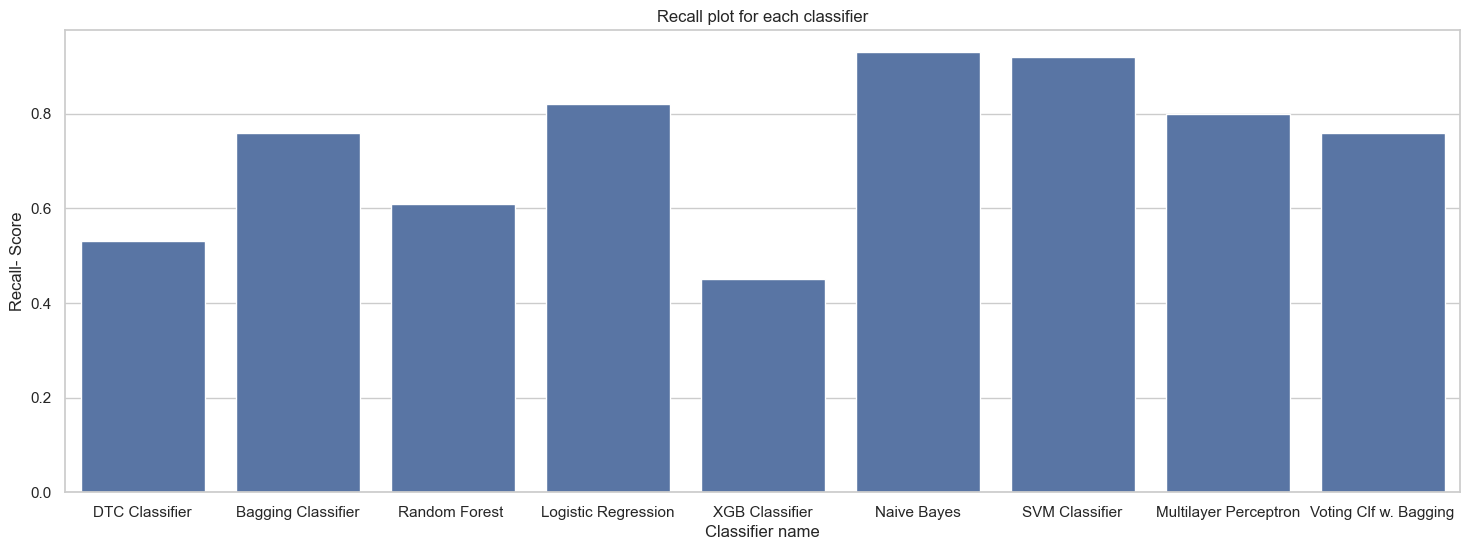

In [148]:
plt.figure(figsize=(18,6))
plt.title('Recall plot for each classifier')
name_arr=['DTC Classifier','Bagging Classifier','Random Forest ','Logistic Regression','XGB Classifier','Naive Bayes','SVM Classifier','Multilayer Perceptron','Voting Clf w. Bagging']
re_sc=[0.53,0.76,0.61,0.82,0.45,0.93,0.92,0.80,0.76]

sns.barplot(x=name_arr,y=re_sc)

plt.xlabel('Classifier name')
plt.ylabel('Recall- Score')

plt.show()